In [1]:
data q4;
   infile 'c1.txt';
   input V1-V12;
run;

SAS Connection established. Subprocess id is 2710



In [2]:
data q1;
set q4 (rename=(V4=risk V3=age V8= teaching V11=nurses));
run;


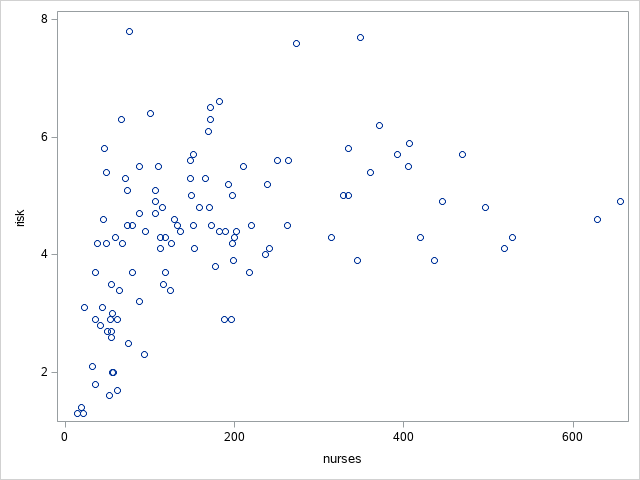

In [10]:
proc sgplot data=q1;
 scatter y=risk x=nurses;
run;

In [11]:
proc print data=q1 (obs=5);
run;

Obs,V1,V2,age,risk,V5,V6,V7,teaching,V9,V10,nurses,V12
1,1,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60
2,2,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40
3,3,8.34,56.9,2.7,8.1,74.0,107,2,3,82,54,20
4,4,8.95,53.7,5.6,18.9,122.8,147,2,4,53,148,40
5,5,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40


In [3]:
data q;
set q1;
MedicalSchool = 1;
if teaching = 2 then MedicalSchool = 0;
age_nurses = age*nurses;
age_medicalschool = age*MedicalSchool;
nurses_medicalschool = nurses*MedicalSchool;
nurses2 = nurses*nurses;
run;


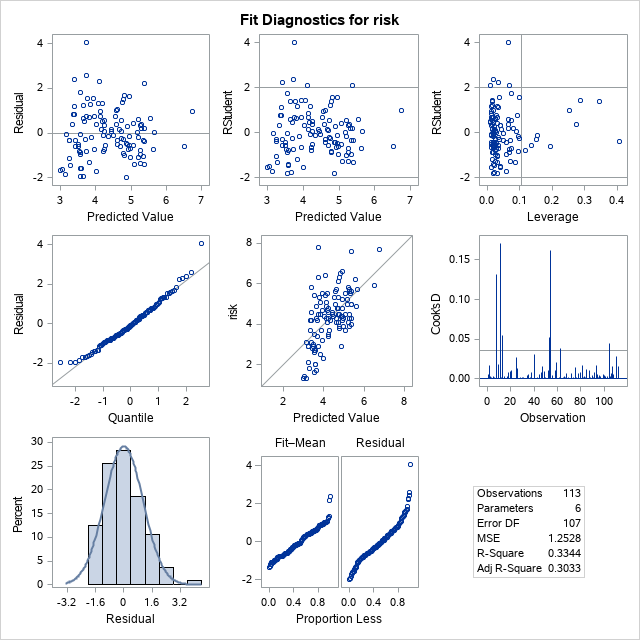
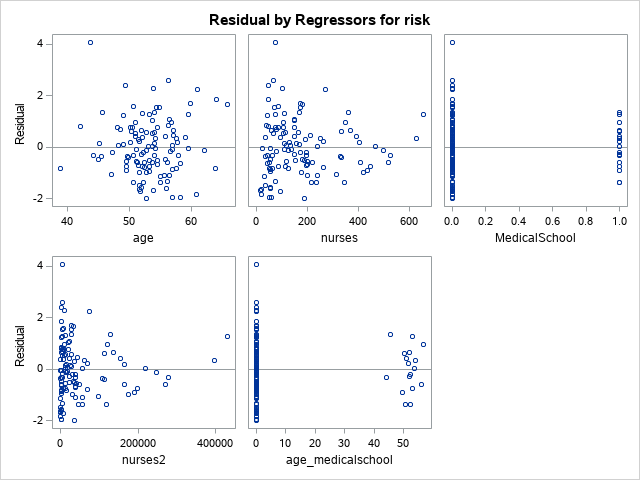

In [12]:
ods html file="q1.html";
title "Question 1 fitted model";
proc reg data=q;
*nurses_medicalschool;
*age_nurses;
model risk = age nurses medicalschool  nurses2  age_medicalschool /ss1 ss2;
output out = q1result r=residual;
run;

In [7]:
data q2;
set q (rename=(V9=region));
region_nurses = region*nurses;
run;

proc sort data=q2;
by region;
run;

In [8]:
proc print data=q2(obs=5);
var nurses nurses2 region region_nurses;
run;

Obs,nurses,nurses2,region,region_nurses
1,151,22801,1,151
2,66,4356,1,66
3,656,430336,1,656
4,349,121801,1,349
5,101,10201,1,101


In [13]:
ods html file="hw6-q2.html";
title "Question 2 fitted model";
*region*nurses;
proc glm data=q2;
class region;
  model risk = nurses nurses2 region  /solution;
  estimate 'Difference in Region 1 and Region 3' region 1 0  -1 0;
  run;